# Aproximações de Números e Funções por Sequências e Séries

Os objetivos desta lição são

- Identificar como lidar com sequências e séries em programação;
- Entender que elementos anteriores da sequência são substituídos;
- Tentar gastar o mínimo de elementos e variáveis (mantendo a clareza);
- Tomar cuidado com overflow e underflow;
- Relembrar/treinar a programação.

## Sequências

Uma sequência em matemática é um conjunto de valores ordenados:
$$ (a_1, a_2, a_3, \dots, a_n, \dots) $$

O índice $1$ usado no primeiro elemento é arbitrário, e serve para normalizar essa ordem.
Em alguns casos é mais interessante começar com o índice $0$.

Matematicamente, costumamos estar interessados na convergência dessa sequência. No entanto, podemos utilizar uma sequência por outros motivos. Computacionalmente, estamos interessados em **como obter os elementos de uma sequência, quando necessário.**

É importante ressaltar aqui a importância da frase **quando necessário**, pois como veremos a seguir, não é do nosso interesse calcular todos esses valores ao mesmo tempo, e quase sempre também não seria possível.

### Exemplo 1

Dado um objeto com aceleração constante de $10 m/s$ saindo do repouso, queremos calcular sua posição nos instantes
$t = 0, 0.1, 0.2, 0.3, \dots$.
Note que temos uma sequência $t_n = (n-1)/10$, e queremos uma sequência $x_n$ das posições.

Neste caso, porém, as leis de movimento nos dizem que
$$ x(t) = x_0 + v_0 t + \frac{1}{2}at^2, $$
que em nosso caso se reduz a
$$ x(t) = 5t^2. $$

Em outras palavras, a sequência $x_n$ pode ser calculada diretamente dado $t_n$, e $t_n$ também tem uma fórmula geral dado $n$,
$$ x_n = 5\bigg(\frac{n-1}{10}\bigg)^2 = \frac{(n-1)^2}{20}. $$
Desse modo, não é necessário guardar nada em especial, pois $x_n$ pode ser calculado diretamente a partir de $n$.

### Exemplo 2

Dado um número $x \in \mathbb{N}, x > 1$, queremos calcular a sequência de Collatz desse número.
Em particular, queremos calcular qual o primeiro elemento que é $1$ (se houver).

Aqui é importante ressaltar a conjectura de Collatz: Dado um número $a_1 \in \mathbb{N}$, e a fórmula recursiva
$$ a_{n+1} = \left\{\begin{array}{ll}
    a_n/2, & \mbox{se } a_n \mbox{ é par}; \\
    3a_n + 1, & \mbox{se } a_n \mbox{ é impar},
\end{array}\right. $$
sempre existe um elemento desta sequência tal que $a_n = 1$. A partir desse ponto a sequência perde a importância. Por exemplo, a sequência de Collatz de 3 é

$$ 3 \rightarrow 10 \rightarrow 5 \rightarrow 16 \rightarrow 8 \rightarrow 4 \rightarrow 2 \rightarrow 1 \rightarrow 4 \rightarrow 2 \rightarrow 1 \cdots $$

Nessa sequência, é necessário saber quem é o ponto atual, e é impossível saber um elemento arbitrário da sequência em casos gerais. Dessa maneira é preciso calcular elemento a elemento.

Lembre-se que para verificar a paridade de um número, utilizamos `%`.

In [1]:
15 % 2

1

In [2]:
14 % 2

0

In [3]:
15 % 2 == 0 # É par ?

false

In [4]:
14 % 2 == 0 # É par ?

true

Lembre-se também que para dividir um número e mantê-lo inteiro, usamos `div`.

In [5]:
div(15, 2)

7

In [6]:
div(14, 2)

7

In [7]:
14/2 # 7.0 e 7 são o mesmo valor, mas são diferentes em computação

7.0

Um **erro** comum de alunos inexperientes nesse caso é **tentar numerar todos os elementos**.

In [8]:
a1 = 3
if a1 % 2 == 0
    a2 = div(a1, 2)
else
    a2 = 3 * a1 + 1
end

10

In [9]:
if a2 % 2 == 0
    a3 = div(a2, 2)
else
    a3 = 3 * a2 + 1
end

5

Essa estratégia logo fica inviável. No entanto, note que precisamos apenas do valor atual da sequência, de maneira que podemos usar apenas uma mesma variável `a` que irá guardar sempre o valor mais atual.

In [10]:
a = 3

3

In [33]:
# Bloco 1
if a % 2 == 0
    a = div(a, 2)
else
    a = 3 * a + 1
end

1

In [12]:
a

10

Rodando mais de uma vez o Bloco 1, fazemos uma nova iteração da sequência.
Para deixar mais claro, vamos guardar também uma variável `n` que diz qual o índice da sequência.

In [34]:
a = 3
n = 1

1

In [41]:
# Bloco 2
if a % 2 == 0
    a = div(a, 2)
else
    a = 3 * a + 1
end
n = n + 1
println("a = $a, n = $n")

a = 1, n = 8


Note que `n` também pode ser usado para responder a pergunta original: quando `a` for 1, teremos o `n` marcando o índice correspondente.

Isso nos leva a um conceito importante. Note que sequências contém infinitos elementos. No entanto, computacionalmente, não podemos fazer contas infinitas. Isso constitui um **loop infinito**. Códigos com loops infinitos são considerados **"errados"** (no sentido de não fazerem o que se espera), então devemos evitá-los.
Portanto, o fato de percebermos que para resolver o problema, devemos fazer a conta do Bloco 2 até que `n` seja 1 é de extrema importância, pois isso evitará um loop infinito (dado que a conjectura de Collatz esteja correta).

Com isso, podemos definir um termo formal para este conjunto de código com um objetivo específico:

**Def. (Algoritmo):** Um algoritmo é uma coleção de instruções para realizar alguma tarefa específica. Segundo Knuth (The Art of Computer Programming, v.1), ele deve satisfazer as seguintes condições, parafraseadas aqui:
- **Finitude:** O algoritmo deve acabar em tempo finito;
- **Bem definido:** As intruções devem ser claras e sem ambiguidade;
- **Entrada:** O algoritmo tem zero ou mais entradas, que são valores determinados antes do algoritmo começar. Essas entradas são especificados a partir de conjuntos de objetos;
- **Saída:** O algoritmo tem uma ou mais saídas, que são quantidades relacionadas com as entradas;
- **Eficácia/Computabilidade:** As operações feitas no algoritmo devem ser suficientemente básicas para que a princípio possam ser executadas por uma pessoa num espaço finito e tempo finito com papel e caneta.

Podemos fazer uma prévia do nosso algoritmo:

In [42]:
#=
1. Entrada: x
2. Inicialização: a ← x, n ← 1.
3. Enquanto a > 1
    1. Se a é par,
        faça a ← a/2
    2. Caso contrário,
        faça a ← 3a + 1.
    3. Incremente n.
4. Saída: n.
=#

Nosso algoritmo para encontrar o primeiro elemento está quase feito. A entrada, saída, e todos os passos estão claros. Todos os passos são triviamente feitos com papel e caneta.
No entanto, temos alguns pequenos problemas:

- **E se a conjectura for falsa?**
Se a conjectura é verdadeira, o algoritmo para quando encontra `1`, que pela conjectura, existe. Mas se não existe, pode ser que tenhamos um loop infinito. Dessa maneira, iremos colocar uma **condição de parada** para a falha do algoritmo. Não existe uma regra para a condição de parada. Deve-se tomar cuidado, no entanto, para não excluir a possibilidade do algoritmo funcionar em muitos casos. Uma condição de parada possível neste caso é que `n` seja muito grande. Se, por exemplo, fizermos 1 milhão de iterações e não encontrarmos `a_n = 1`, então talvez ele não exista. Note que essa condição exclui algumas soluções de aparecerem, por exemplo
$$ a_1 = 2^{1.000.000}. $$
É fácil ver que $a_n = 2^{1.000.001 - n}$, de modo que para `n = 1.000.001` teremos $a_n = 1$.

Muitas vezes a condições de parada de falha é um limitante físico para deixar o algoritmo tratável. É muito fácil escolher um número `x` tal que nosso algoritmo leve horas para convergir. Não é do nosso interesse esperar tanto para um algoritmo recreativo. Poderíamos colocar uma condição de tempo então. Qual condição escolher é um assunto complicado, que depende de muitos outros fatores além da disciplina.
Em especial, a teoria matemática arredor do problema deve ser considerada. Imagine que a conjectura de Collatz é falsa, e que `x` é um valor finito tal que a sequência gerada com `a_1 = x` nunca decresça à `1`. *Como é possível verificar que `x` é um contra-exemplo para a conjectura?*

- **O maior inteiro.**
O computador é uma máquina física, com limitações impostas para que seja possível fazer contas determinísticas.
Dessa maneira, ele segue regras para definir números inteiros e "reais" (as aspas serão explicadas depois), e essas regras limitam o maior inteiro que pode ser representado por um tipo específico de dado.
Mais importante, esse valor é independente da linguagem. A saber, o tipo de inteiro básico do Julia é o `Int64`, de 64 bits, e cujo maior valor é $2^{63}-1 \approx 10^{18}$. Coisas estranhas acontecem se fizermos qualquer conta com esse valor, de modo que é imperativo não ultrapassá-lo. Vamos colocar uma nova condição de parada no nosso código: se $a > 10^{17}$, também paramos.

In [43]:
#=
1. Entrada: x ∈ N
2. Inicialização: a ← x, n ← 1, a_bound = 10^17, n_bound = 1_000_000
3. Se a ≦ 0
    faça n ← 0
    termine o algoritmo
4. Enquanto a > 1
    1. Se a é par,
        faça a ← a/2
    2. Caso contrário,
        faça a ← 3a + 1.
    3. Incremente n.
    4. Se a > a_bound
        faça n ← -1 e termine o algoritmo
    5. Se n > n_bound
        faça n ← -2 e termine o algoritmo
5. Saída: n
    Se n > 0, então a_n = 1: Saída bem sucedida,
    Se n = 0, então x ≦ 0: Saída de erro na entrada,
    Se n = -1, então a ficou muito grande: Saída de valor muito grande,
    Se n = -2, então n ficou muito grande: Saída de muitas iterações.
=#

In [47]:
# Keyword argument
function collatz(a::Int; a_bound = 10^17, n_bound = 1_000_000) # O mesmo que começar com x e atribuir x à a.
    n = 1
    if a <= 0
        return 0
    end
    while a > 1
        print("$a ")
        if a % 2 == 0
            a = div(a, 2)
        else
            a = 3a + 1
        end
        n += 1
        if a > a_bound
            return -1
        elseif n > n_bound
            return -2
        end
    end
    return n
end

collatz (generic function with 1 method)

In [54]:
collatz(10290001)

10290001 30870004 15435002 7717501 23152504 11576252 5788126 2894063 8682190 4341095 13023286 6511643 19534930 9767465 29302396 14651198 7325599 21976798 10988399 32965198 16482599 49447798 24723899 74171698 37085849 111257548 55628774 27814387 83443162 41721581 125164744 62582372 31291186 15645593 46936780 23468390 11734195 35202586 17601293 52803880 26401940 13200970 6600485 19801456 9900728 4950364 2475182 1237591 3712774 1856387 5569162 2784581 8353744 4176872 2088436 1044218 522109 1566328 783164 391582 195791 587374 293687 881062 440531 1321594 660797 1982392 991196 495598 247799 743398 371699 1115098 557549 1672648 836324 418162 209081 627244 313622 156811 470434 235217 705652 352826 176413 529240 264620 132310 66155 198466 99233 297700 148850 74425 223276 111638 55819 167458 83729 251188 125594 62797 188392 94196 47098 23549 70648 35324 17662 8831 26494 13247 39742 19871 59614 29807 89422 44711 134134 67067 201202 100601 301804 150902 75451 226354 113177 339532 169766 84883 254

234

In [55]:
collatz(2^30, n_bound=10)

1073741824 536870912 268435456 134217728 67108864 33554432 16777216 8388608 4194304 2097152 

-2

In [56]:
collatz(1)

1

In [57]:
collatz(10^17+2)

100000000000000002 50000000000000001 

-1

## Fibonacci

Vamos continuar nosso exemplo com mais uma sequência interessante, a de Fibonacci:

$$ F_1 = F_2 = 1 \qquad F_{n+1} = F_n + F_{n-1}. $$

A sequência de Fibonacci envolve dois termos, e cresce infinitamente. Existem vários motivos para se trabalhar com a série de Fibonacci, mas vamos utilizá-la recreativamente.
Vamos criar um simples algoritmo para calcular o n-ésimo termo da série de Fibonacci. Assuma, por enquanto, que todos os termos serão bem representados por inteiros de 64 bits.

In [ ]:
#=
   Entrada: n inteiro
1. Se n ≦ 0
    retorne 0
2. Se n = 1 ou n = 2
    retorne 1
3. Inicialização: F1 ← 1, F2 ← 1, k ← 2
4. Enquanto k < n
    1. Fnovo ← F1 + F2  # Isso calcula o valor novo
    2. F1 ← F2 # O valor F2 passa a ser o mais antigo dos dois
    3. F2 ← Fnovo # O valor Fnovo passa a ser o anterior
    4. Incremente k
5. Retorne F2.
    Saída: 0 se a entrada estava incorreta,
           F_n caso contrário.
=#

In [60]:
function fibon(n::Int)
    if n ≤ 0 #\le
        return 0
    elseif n == 1 || n == 2
        return 1
    end
    F1, F2, k = 1, 1, 2
    while k < n
        F1, F2 = F2, F1 + F2
        k += 1
    end
    return F2
end

fibon (generic function with 1 method)

In [61]:
for n = 1:20
    println("F_$n = $(fibon(n))")
end

F_1 = 1
F_2 = 1
F_3 = 2
F_4 = 3
F_5 = 5
F_6 = 8
F_7 = 13
F_8 = 21
F_9 = 34
F_10 = 55
F_11 = 89
F_12 = 144
F_13 = 233
F_14 = 377
F_15 = 610
F_16 = 987
F_17 = 1597
F_18 = 2584
F_19 = 4181
F_20 = 6765


É bastante simple calcular um elemento da sequência de Fibonacci, e é interessante que podemos explorar outra maneira de fazer isso.

### Recursão

In [62]:
function fat_por_recursao(n::Int)
    if n < 0
        error("BLAH")
    end
    if n == 0
        return 1
    end
    return n * fat_por_recursao(n - 1)
end

fat_por_recursao (generic function with 1 method)

In [63]:
fat_por_recursao(5)

120

In [64]:
fat_por_recursao(21)

-4249290049419214848

In [66]:
# operador ternário
# PROP ? Resultado se SIM : Resultado se NAO
5 > 0 ? "ok" : "oops"

"ok"

In [67]:
fat_uma_linha(n::Int) = n == 0 ? 1 : n * fat_uma_linha(n - 1)

fat_uma_linha (generic function with 1 method)

In [68]:
fat_uma_linha(5)

120

Recursão é uma das partes mais importantes no desenvolvimento de códigos. Muitas estratégias computacionais e matemáticas envolvem o chamado "dividir e conquistar" ou "reduzir para um caso conhecido". Em particular, demonstrações por indução finita fazem uma coisa parecida, onde você supõe saber resolver para um caso e consegue resolver um caso de nível superior reduzindo-o ao caso conhecido.

Computacionalmente, podemos pensar em recursão como a divisão de um problema em outros, cada um destes menor que o primeiro. Para cada problema menor, repetimos o processo. Como não podemos ter um loop infinito, é necessário terminar essa redução de alguma maneira. Essa maneira envolve, simplesmente, saber resolver alguns casos de problema menor (que garantam a convergência).

No caso de Fibonacci, o cálculo do n-ésimo termo é feito calculando os termos n-1 e n-2.
Os casos n-1 e n-2 são, de fato, menores. Além disso, repetindo este processo chegaremos a dois casos: n = 1 ou n = 2. Desse modo, temos

- casos pequenos que conseguimos resolver trivialmente;
- uma maneira de reduzir um problema em outros menores;
- garantia matemática que essa redução leva aos problemas menores que sabemos resolver.

Abaixo temos um pseudo-código.

In [ ]:
#=
Rotina FIBO(n)
Entrada: n
1. Se n = 1 ou n = 2
    retorne 1
2. Senão,
    retorna FIBO(n-1) + FIBO(n-2)
=#

In [69]:
function FIBO(n)
    if n <= 2
        return min(1, max(n, 0)) # Pequeno truque
    else
        return FIBO(n-1) + FIBO(n-2)
    end
end

FIBO (generic function with 1 method)

In [70]:
FIBO(10)

55

In [71]:
for n = 1:20
    println("F_$n = $(FIBO(n))")
end

F_1 = 1
F_2 = 1
F_3 = 2
F_4 = 3
F_5 = 5
F_6 = 8
F_7 = 13
F_8 = 21
F_9 = 34
F_10 = 55
F_11 = 89
F_12 = 144
F_13 = 233
F_14 = 377
F_15 = 610
F_16 = 987
F_17 = 1597
F_18 = 2584
F_19 = 4181
F_20 = 6765


Muitas vezes, o código de recursão será mais curto.
Em particular, em Julia (e C) temos o chamado **operador ternário**, que nos permite fazer a pergunta `if ... else ... end` em uma única linha.
Desse modo, temos uma implementação curtíssima de Fibonacci:

In [72]:
F(n) = n <= 2 ? min(1, max(n, 0)) : F(n-1) + F(n-2)

F (generic function with 1 method)

In [73]:
for n = 1:20
    println("F_$n = $(F(n))")
end

F_1 = 1
F_2 = 1
F_3 = 2
F_4 = 3
F_5 = 5
F_6 = 8
F_7 = 13
F_8 = 21
F_9 = 34
F_10 = 55
F_11 = 89
F_12 = 144
F_13 = 233
F_14 = 377
F_15 = 610
F_16 = 987
F_17 = 1597
F_18 = 2584
F_19 = 4181
F_20 = 6765


No entanto, é importante ter cuidado ao utilizar recursão. O custo computacional fica escondido nas chamadas de função, e às vezes podemos deixar um código muito mais complicado do que deveria.
No caso de Fibonacci, por exemplo, ao calcular `F(n)`, pedimos o cálculo de `F(n-1)` e `F(n-2)`, mas o cálculo de `F(n-1)` irá pedir o cálculo de `F(n-2)` e `F(n-3)`, ou seja, `F(n-2)` será calculado duas vezes!

In [74]:
function FIBO_comprint(n)
    println("Chamada: F$n")
    if n <= 2
        return min(1, max(n, 0)) # Pequeno truque
    else
        return FIBO_comprint(n-1) + FIBO_comprint(n-2)
    end
end

FIBO_comprint (generic function with 1 method)

In [75]:
FIBO_comprint(5)

Chamada: F5
Chamada: F4
Chamada: F3
Chamada: F2
Chamada: F1
Chamada: F2
Chamada: F3
Chamada: F2
Chamada: F1


5

Em outras palavras, Fibonacci com recursão acaba sendo muito mais caro que Fibonacci usando `for` ou `while`. Tome cuidado com essas armadilhas.

**Leitura adicional:** Existe um conceito chamada "Avaliação preguiçosa", que consiste na avaliação dos valores somente quando são necessários. Em Julia, o pacote `Lazy.jl` implementa esse conceito. Se a avaliação de `F(n)` for feita de maneira preguiçosa, não haverá o custo adicional do cálculo de $F_n$ repetidos.

## Mais Fibonacci

Vamos voltar nossa atenção ao problema inicial de Fibonacci: calcular o n-ésimo termo. Nossas últimas discussões foram todas no sentido de como calcular os elementos de Fibonacci termo a termo ou recursivamente. Porém, matematicamente, o n-ésimo termo de Fibonacci é bem definido!

$$ F_n = \frac{\phi^n - \psi^n}{\sqrt{5}}, $$
onde $$\phi = \frac{1 + \sqrt{5}}{2}$$ e $$\psi = \frac{1 - \sqrt{5}}{2} = 1 - \phi. $$

Isso quer dizer que podemos calcular Fibonacci com uma fórmula direta.

In [77]:
phi = (1 + sqrt(5))/2
psi = 1 - phi
for n = 1:20
    Fn = round(Int, (phi^n - psi^n)/sqrt(5))
    println("F_$n = $Fn")
end

F_1 = 1
F_2 = 1
F_3 = 2
F_4 = 3
F_5 = 5
F_6 = 8
F_7 = 13
F_8 = 21
F_9 = 34
F_10 = 55
F_11 = 89
F_12 = 144
F_13 = 233
F_14 = 377
F_15 = 610
F_16 = 987
F_17 = 1597
F_18 = 2584
F_19 = 4181
F_20 = 6765


Perceba que o problema aqui agora é outro. Os valores não estão mais "corretos". Na verdade, quase todos contém um pequeno **erro**.

Quão pequeno?

In [78]:
phi = (1 + sqrt(5))/2
psi = 1 - phi
F1 = F2 = 1
Fnovo = 1
for n = 3:93
    Fn = (phi^n - psi^n)/sqrt(5)
    Fnovo = F1 + F2
    F2 = F1
    F1 = Fnovo
    println("F_$n = $Fnovo, Diferença F_$n = $(Fn - Fnovo)")
end

F_3 = 2, Diferença F_3 = 0.0
F_4 = 3, Diferença F_4 = 4.440892098500626e-16
F_5 = 5, Diferença F_5 = 8.881784197001252e-16
F_6 = 8, Diferença F_6 = 1.7763568394002505e-15
F_7 = 13, Diferença F_7 = 1.7763568394002505e-15
F_8 = 21, Diferença F_8 = 3.552713678800501e-15
F_9 = 34, Diferença F_9 = 7.105427357601002e-15
F_10 = 55, Diferença F_10 = 1.4210854715202004e-14
F_11 = 89, Diferença F_11 = 2.842170943040401e-14
F_12 = 144, Diferença F_12 = 5.684341886080802e-14
F_13 = 233, Diferença F_13 = 5.684341886080802e-14
F_14 = 377, Diferença F_14 = 1.7053025658242404e-13
F_15 = 610, Diferença F_15 = 3.410605131648481e-13
F_16 = 987, Diferença F_16 = 4.547473508864641e-13
F_17 = 1597, Diferença F_17 = 9.094947017729282e-13
F_18 = 2584, Diferença F_18 = 1.8189894035458565e-12
F_19 = 4181, Diferença F_19 = 2.7284841053187847e-12
F_20 = 6765, Diferença F_20 = 4.547473508864641e-12
F_21 = 10946, Diferença F_21 = 7.275957614183426e-12
F_22 = 17711, Diferença F_22 = 1.0913936421275139e-11
F_23 = 286

Impressionantemente, esse erro não é tão pequeno assim. Ele cresce com o tamanho de `n`, de modo que essa aproximação é inviável para valores grandes de `n`.

A fórmula para o n-ésimo número de Fibonacci é
$$ F_n = \frac{\phi^n - \psi^n}{\sqrt{5}}. $$

Acontece que $\phi > 1$ e $0 < \psi < 1$, então a distância entre $\phi^n$ e $\psi^n$ cresce bastante com $n$.
Além disso, ambos são irracionais, então seus valores já são aproximados. Neste caso, é mais simples calcular os números de Fibonacci utilizando `for` ou `while` com inteiros.
Claro que isso também vai depender do motivo para se calcular esses números.

# Aproximações de Séries

Vamos para um assunto levemente diferente. Uma série é uma soma de infinitos termos numa ordem dada.
$$ S = \sum_{k = 1}^{\infty} a_k. $$
A questão aqui é, em geral, se essa soma existe ou não. Para tanto, define-se uma sequência $(s_1,s_2,\dots,s_n,\dots)$ dada por
$$ s_n = \sum_{k = 1}^n a_k. $$

Se essa sequência convergence, então essa série converge.

Computacionalmente, em geral, estamos mais preocupados em calcular essa soma. Um resultado básico de série diz que para que a série convirja, é necessário que $a_k \rightarrow 0$. Como já vimos, isso irá nos causar alguns problemas, dado que
$$ s_{n+1} = s_n + a_{n+1}, $$
e $a_{n+1}$ vai eventualmente ser muito pequeno.

Matematicamente, muitas vezes temos um objetivo, como calcular $\pi$, que pode ser obtido pelo cálculo de uma série. Devemos nos preocupar em como fazer isso de uma maneira computacional eficiente que não perca muita precisão. Frequentemente, teremos limites computacionais para essa eficiência, e aí devemos voltar à matemática para conseguir alguma maneira melhor de resolver o problema inicial.

## Expansão de Taylor

Como deve ter sido visto no curso de Cálculo, uma função continuamente diferenciável até ordem $n$ admite uma aproximação polinomial em torno de um ponto $a$ de seu domínio dada por
$$ P_n(x) = f(a) + f'(a)(x-a) + \frac{1}{2}f''(a)(x-a)^2 + \frac{1}{3!}f'''(a)(x-a)^3 + \dots + \frac{1}{n!}f^{(n)}(a)(x-a)^n. $$

Esse polinômio é chamado polinômio de Taylor de ordem $n$ em torno do ponto $a$, e existem alguns teoremas indicando o quão boa é essa aproximação.

**Teorema:** Se $f$ é continuamente diferenciável até ordem $n$ no ponto $a$, então
$$ f(x) = P_n(x) + r_n(x), $$
onde
$$ \lim_{x \rightarrow a} \frac{ r_n(x) }{ |x - a|^n } = 0. $$

**Teorema:** Se $f$ é continuamente diferenciável até ordem $n+1$ no intervalo fechado de $a$ à $x$, então
$$ f(x) = P_n(x) + \int_a^x \frac{f^{(n+1)}(t)}{n!}(x-t)^n \mbox{d} t. $$

**Teorema:** Se $f$ é continuamente diferenciável até ordem $n+1$ num intervalo aberto contento $a$ e $f^{(n)}$ é contínua no intervalo fechado de $a$ à $x$, então
$$ f(x) = P_n(x) + \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - a)^{n + 1}, $$
onde $\xi$ é um número real entre $a$ e $x$.

Podemos usar o conceito da expansão de Taylor para calcular numericamente alguns valores de funções não polinomiais. O caso mais comum é o da função $\exp(x) = e^x$, onde $e$ é o número de Euler.

In [80]:
MathConstants.e

ℯ = 2.7182818284590...

*Aviso: A função exponencial já costuma estar implementada em baixo nível, no entanto faremos este estudo por questões didáticas.*

A função $e^x$ tem a seguinte expansão de Taylor em torno do ponto $0$.
$$ e^x = 1 + x + \frac{x^2}{2} + \frac{x^3}{3!} + \frac{x^4}{4!} + \dots + \frac{x^n}{n!} + \dots. $$

Então é bastante simples definir um algoritmo que calcule a aproximação da exponecial dado $x$ e $n$.

In [ ]:
#=
    Entrada: x e n ≧ 0
1. Inicialização: E ← 1.0
2. Para k de 1 à n
    1. E ← E + x^k/k!
3. Retorne E
    Saída: E ≈ eˣ com n termos da expansão de Taylor
=#

In [81]:
E = 1.0
E += 1.0   # k = 1
E += 0.5   # k = 2
E += 1/6   # k = 3
E += 1/24  # k = 4
E += 1/120 # k = 5

2.7166666666666663

In [83]:
MathConstants.e - E

0.0016151617923787498

In [1]:
function exponencial(x, n)
    # Exercício. Usa a função factorial(n) para calcular n!
    E = 1.0
    for k = 1:n
        E += x^k / factorial(k)
    end
    return E
end

exponencial (generic function with 1 method)

In [2]:
exponencial(1.0, 20)

2.7182818284590455

In [4]:
MathConstants.e^10 - exponencial(10.0, 20)

34.98376914165419

Vamos testar nossa função contra `exp`, calculando o erro dessa aproximação.
No entanto, note que a função exponencial cresce rapidamente, e como vimos, a precisão de um valor é relativo ao valor. Sendo assim, vamos utilizar o **erro relativo** na nossa comparação.

**Definição:** O erro cometido ao se aproximar $x$ por $x'$ é $x - x'$.

**Definição:** O **erro absoluto** cometido ao se aproximar $x$ por $x'$ é $|x - x'|$.

**Definição:** O **erro relativo** cometido ao se aproximar $x$ por $x'$ é $\dfrac{|x - x'|}{|x|}$.

In [3]:
using Plots
pyplot(size=(400,300))

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at none:0
└ @ Core none:0


Plots.PyPlotBackend()

In [7]:
N = collect(1:25)
Erro = [abs(exponencial(1.0, n) - exp(1.0))/exp(1.0) for n in N]
scatter(N, Erro, yaxis=:log)

OverflowError: OverflowError: 21 is too large to look up in the table

Note que após $n = 17$, o erro é sempre a precisão da máquina. Isso quer dizer que os termos $a_n$ com $n > 17$ não afetam a soma, computacionalmente.

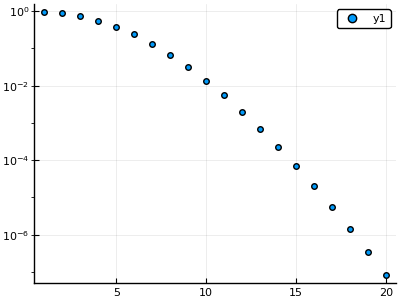

In [6]:
Erro = [abs(exponencial(5.0, n) - exp(5.0))/exp(5.0) for n in N]
scatter(N, Erro, yaxis=:log)

Veja que é erro é muito maior para $x = 5$ do que para $x = 1$. Isso acontece porque os termos além de $n > 20$  ainda são importantes para a aproximação de $e^5$.
A primeira vista, uma simples solução seria utilizar $n > 20$, mas veja o que acontece com nossa implementação.

Se você se lembra bem, isso acontece porque para $21!$ é maior que o máximo dos inteiros de 64 bits. Isso quer dizer que para calcular $e^x$ corretamente, devemos dar mais atenção aos detalhes do algoritmo.
Note também que $x^n$ pode acabar ficando muito grande para $x$ e $n$ grandes e causar overflow também.

Revisitando nossa soma:
$$ s_n = 1 + x + \frac{x^2}{2} + \dots + \frac{x^n}{n!}, $$
de modo que
$$ s_n = s_{n-1} + \frac{x^n}{n!}. $$
O termo à direita da soma não pode ser calculado diretamente pois cada termo da fração pode "explodir" (termo que utilizarei para dizer causar overflow). No entanto, o resultado da fração é bem comportado, então podemos tentar chegar nesse valor de outra maneira.

Veja que
$$ \frac{x^n}{n!} = \frac{x\times x\times x\times\dots\times x}{1\times2\times3\times\dots\times n}
= \frac{x}{1}\times\frac{x}{2}\times\frac{x}{3}\times\dots\times\frac{x}{n},
$$
então podemos fazer esse cálculo seguindo essa ordem, de maneira que o produto todo ficará equilibrado.

No entanto, é possível deixar esse produto mais eficiente. Note que se chamarmos $t_n = \dfrac{x^n}{n!}$, então

$$ s_n = s_{n-1} + t_n, $$
e
$$ t_n = t_{n-1}\times\frac{x}{n}. $$

Em outras palavras, a sequência que é somada também pode ser calculada utilizando o termo anterior. Cada iteração fará então apenas um produto, uma divisão, e uma soma.

In [ ]:
#=
    Entrada: x e n ≧ 0
1. Inicialização: E ← 1.0, t ← 1.0
2. Para k de 1 à n
    1. t ← t * x / k
    2. E ← E + t
3. Retorne E
    Saída: E ≈ eˣ com n termos da expansão de Taylor
=#

In [2]:
function exponencial2(x, n)
    # Implemente
    E = 1.0
    t = 1.0
    for k = 1:n
        t *= x / k
        E += t
    end
    return E
end

exponencial2 (generic function with 1 method)

In [3]:
exponencial2(1.0, 20)

2.7182818284590455

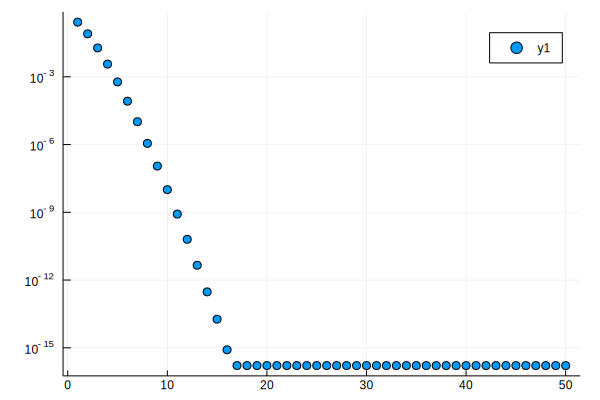

In [5]:
using Plots
N = collect(1:50)
Erro = [abs(exponencial2(1.0, n) - exp(1.0))/exp(1.0) for n in N]
Erro[findall(Erro .== 0.0)] .= eps()
scatter(N, abs.(Erro), yaxis=:log)

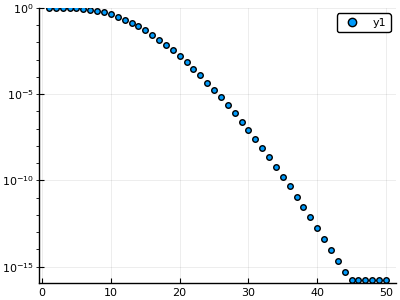

In [18]:
N = collect(1:50)
Erro = [abs(exponencial2(10.0, n) - exp(10.0))/exp(10.0) for n in N]
Erro[findall(Erro .== 0.0)] .= eps()
scatter(N, Erro, yaxis=:log)
ylims!(eps()/2, 1.0)

Perceba agora que a função `exp` não recebe um $n$ específico. A quantidade de termos calculados é específico para o valor $x$. Para $x = 0$, $n = 0$ basta, para $x = 1$, $n = 17$ basta, para $x = 10$, $n = 45$ foi necessário.

Em particular, como estamos fazendo uma atualização do tipo $s_n = s_{n-1} + t_n$ e $t_n$ tende a 0, podemos verificar se obtivemos um erro de arredondamento na soma, de modo que os termos seguintes também não acrescentarão nada.

In [ ]:
#=
    Entrada: x
1. Inicialização: E ← 1.0, t ← x, k ← 1
2. Enquanto E + t ≠ E
    1. E ← E + t
    2. Incremente k
    3. t ← t * x / k
3. Retorne E
    Saída: E ≈ eˣ
=#

In [6]:
function exponencial3(x)
    # Implemente
    E = 1.0
    t = x
    k = 1
    while E + t != E
        E += t
        k += 1
        t *= x / k
    end
    return E
end

exponencial3 (generic function with 1 method)

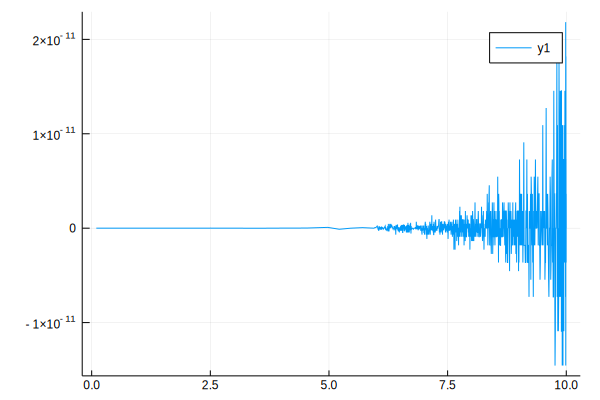

In [7]:
plot(x->exp(x) - exponencial3(x), 0, 10.0)

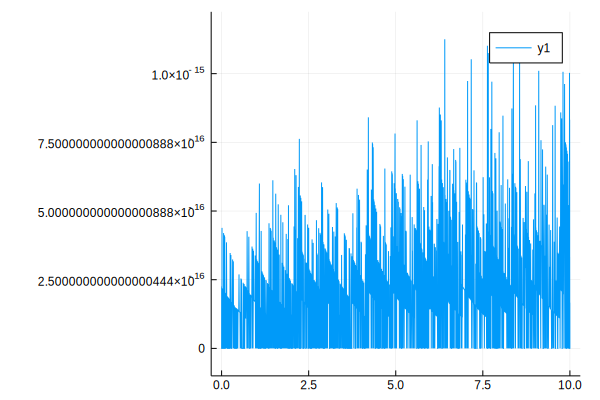

In [8]:
plot(x->abs(exp(x) - exponencial3(x))/exp(x), 0, 10.0)

Por fim, vejamos o que acontece com $x < 0$.

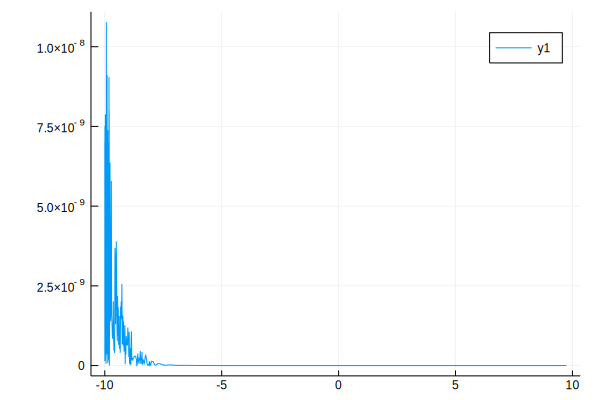

In [9]:
plot(x->abs(exp(x) - exponencial3(x))/exp(x), -10.0, 10.0)

O erro cresce novamente. Isso acontece porque o termo $t_n$ fica alternando de sinal, e fica pequeno antes de contribuir o suficiente para fazer a diferença necessária.
Uma maneira de remediar esse problema é usar a relação $e^x = \dfrac{1}{e^{-x}}$.

In [10]:
function exponencial4(x)
    if x < 0
        return 1.0/exponencial4(-x)
    end
    # Implemente
    return exponencial3(x)
end

exponencial4 (generic function with 1 method)

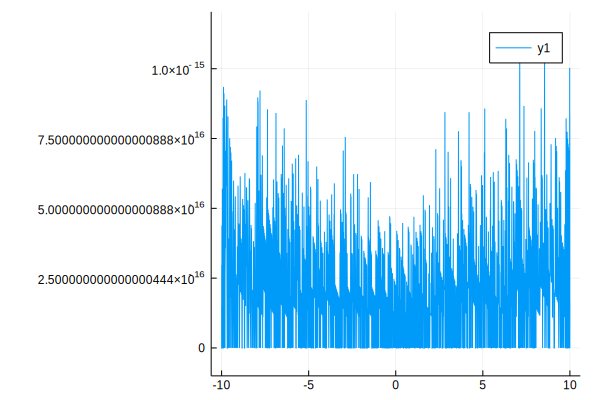

In [11]:
plot(x->abs(exp(x) - exponencial4(x))/exp(x), -10.0, 10.0)

## Cálculo de $\pi$

Um tópico bastante interessante de computação matemática é o cálculo do valor de $\pi$. O interesse no cálculo de $\pi$ é antigo, e existem várias maneiras de fazê-lo. Além disso, a busca pelo valor de $\pi$ com a maior quantidade de dígitos corretos é uma disputa matemática bastante acirrada.

Das maneiras de calcular $\pi$, uma das mais interessantes, em minha opinião, é através da identidade
$$ \arctan 1 = \frac{\pi}{4} \qquad \Rightarrow \qquad \pi = 4 \arctan 1. $$

Agora, utilizamos a derivada de $\arctan$:
$$ \frac{\mbox{d}}{\mbox{d}x}\arctan x = \frac{1}{1+x^2}, $$
e a expansão da fração para $|x| < 1$:
$$ \frac{1}{1+x^2} = 1 - x^2 + x^4 - x^6 + \dots + (-1)^n x^{2n} + \dots. $$

Integrando, temos
$$ \arctan x = x - \frac{x^3}{3} + \frac{x^5}{5} - \frac{x^7}{7} + \dots + (-1)^n\frac{x^{2n+1}}{2n+1} + 
\dots$$

É possível mostrar que essa série converge para $x = 1$ também, de modo que
$$ \frac{\pi}{4} = \arctan 1 = 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \dots \frac{(-1)^n}{2n+1} + \dots. $$

Utilizando conceitos parecidos com o da expansão da exponencial, podemos calcular $\pi$ sem precisar passar um valor de $n$, **porém**, essa convergência é muito lenta. No exemplo abaixo, colocaremos uma condição de parada para $n > 1.000.000.000$.

In [27]:
function pi_atan()
    S = 1.0
    n = 1
    σ = -1
    t = σ/(2n+1)
    while S + t != S
        S += t
        σ = -σ
        n += 1
        t = σ/(2n+1)
        if n > 1_000_000_000_000
            break
        end
    end
    return 4S
end

pi_atan (generic function with 1 method)

In [28]:
pi_atan()

InterruptException: InterruptException:

In [26]:
@time pi_atan() - pi

  2.454564 seconds (6 allocations: 192 bytes)


4.98283636574115e-10

O valor é, de fato, calculado até uma aproximação razoável, mas demora muito e leva muitas iterações.
Por sorte, existem dezenas de outras maneiras de se calcular $\pi$.

Uma dessas maneiras é a série
$$ \pi = \sqrt{12}\bigg(1 - \frac{1}{3\times 3} + \frac{1}{5\times 3^2} - \frac{1}{7\times 3^3} + \frac{1}{9\times 3^4} - \dots\bigg) = \sqrt{12}\sum_{k=0}^{\infty}\frac{(-1)^k}{(2k+1)3^k}. $$

In [30]:
function pi_madhava()
    S = 1.0
    third = 1.0/3.0
    σ = -1
    pow_third = third
    t = σ * third * third
    n = 1
    while S + t != S
        S += t
        n += 1
        pow_third *= third
        σ = -σ
        t = σ * pow_third / (2n + 1)
    end
    println("n = $n") # Usar para mostrar quantas iterações
    return sqrt(12) * S
end

pi_madhava (generic function with 1 method)

In [31]:
pi_madhava() - pi

n = 31


8.881784197001252e-16

Note que com 31 iterações já chegamos num valor de $\pi$ decente.

In [32]:
function pi_madhava()
    S = 1.0
    terco = 1/3
    M = -terco
    t = M / 3
    n = 1
    while S + t != S
        S += t
        n += 1
        M = -M * terco
        t = M / (2n + 1)
    end
    println("n = $n") # Usar para mostrar quantas iterações
    return sqrt(12) * S
end

pi_madhava (generic function with 1 method)

In [33]:
pi_madhava()

n = 31


3.141592653589794

### $\pi$ com BigFloat

Como dito anteriormente, existe uma busca por $\pi$ com diversas casas decimais corretas. Você já deve ter percebido que o Julia traz uma implementação própria de $\pi$, chamada através de `pi`. Essa aproximação pode ser vista com `BigFloat` também.

In [34]:
BigFloat(pi)

3.141592653589793238462643383279502884197169399375105820974944592307816406286198

Podemos modificar nossa implementação para buscar $\pi$ com `BigFloat` também.

In [45]:
function pi_madhava_BF()
    S = BigFloat(1.0)
    third = BigFloat(1.0/3.0)
    σ = -1
    pow_third = third
    t = σ * third * third
    n = 1
    while S + t != S
        S += t
        n += 1
        pow_third *= third
        σ = -σ
        t = σ * pow_third / (2n + 1)
    end
    println("n = $n") # Usar para mostrar quantas iterações
    return sqrt(BigFloat(12.0)) * S
end

pi_madhava_BF (generic function with 1 method)

In [47]:
setprecision(2^10)
pi_madhava_BF() - pi

n = 641


3.645186378176063722270482997117532622639459655962118750281208068549077821224133532241676031223167727614758311426783650736587813383024163747310830806565772044178140785011670055242124045048103979296091678379084391470568239198744517334597791699323103002727803341736677490769931200442931381838462863698426363621082e-17

In [40]:
setprecision(2^10)
round(Int, -log10(eps(BigFloat)))

308

In [42]:
for n = 10:20
    setprecision(2^n)
    E = max(pi_madhava_BF() - BigFloat(pi), eps(BigFloat))
    casas = round(Int, -log10(E))
    println("Com $(2^n) bits obtive $casas casas")
end

n = 641
Com 1024 bits obtive 308 casas
n = 1286
Com 2048 bits obtive 616 casas
n = 2578
Com 4096 bits obtive 1231 casas
n = 5161
Com 8192 bits obtive 2466 casas
n = 10329
Com 16384 bits obtive 4932 casas
n = 20666
Com 32768 bits obtive 9862 casas
n = 41339
Com 65536 bits obtive 19726 casas
n = 82687
Com 131072 bits obtive 39455 casas


InterruptException: InterruptException:

In [53]:
setprecision(2^15)
@time pi_madhava_BF();

n = 20666
  0.183179 seconds (206.71 k allocations: 420.990 MiB, 21.29% gc time)


# Exercícios

Faça os exercícios do capítulo 1 do livro Cálculo Numérico de Ruggiero e Lopes.

1. Calcule a expansão de Taylor das seguintes funções, em torno do ponto a dado:

  - $f(x) = x^2 - 5x + 6$, $a = 2$;
  - $g(x) = x^3 - 3x^2 + 3x - 1$, $a = 1$;
  - $h(x) = e^x$, $a = 0$;
  - $z(x) = \ln (x)$, $a = 1$;

5. Considere as seguintes séries e sequências convergentes:

  - $2 = 1 + \frac{1}{2} + \frac{1}{4} + \frac{1}{8} + \dots + \frac{1}{2^n} + \dots$.
  - $a_{n+1} = \frac{a_n}{2} + \frac{1}{a_n}$, com $a_1 = 1$.
  - $b_{n+1} = \sqrt{b_n + 1}$, com $b_1 = 1$.
  - $\phi_n = \dfrac{F_n}{F_{n-1}}$, onde $F_n$ é o n-ésimo termo de Fibonacci.
  - Alguma série para $\pi$ da internet.

  Para cada uma delas, faça os seguintes itens

  - Implemente uma função que recebe um número $n$ e calcula a soma parcial $s_n$
    se o item for uma série, ou n-ésimo elemento se o item for uma sequência.
    Faça sua função ser o mais econômica possível e evite overflows.
  - Faça um gráfico do erro pelo número de termos $n$.
  - Dado $\varepsilon > 0$, é possível determinar n de modo que o erro seja menor que $\varepsilon$?
    Veja quantos casos você consegue fazer isso, ou encontrar algum limitante
    desse tipo.

In [59]:
2 * (1 + 1/3 + 2 / 15 + 6 / 15/7 + 24 / 15 / 7 /9)

3.098412698412698

In [66]:
fat_impar = 1
n = 0

0

In [84]:
n = n + 1
fat_impar = fat_impar * (2n + 1)

-8006580162858909745

In [85]:
function duplo_fatorial(n)
    if n == 1 || n == 2
        return n
    end
    return duplo_fatorial(n - 2) * n
end

duplo_fatorial (generic function with 1 method)

In [99]:
function pi_da_aula()
    S = big"1.0"
    #= Maneira 1
    for k = 1:14
        S += factorial(k) / duplo_fatorial(2k + 1)
    end
    =#
    t = big"1.0" / 3
    k = 2
    while S + t != S
        S += t
        t = t * k / (2k + 1)
        k += 1
    end
    return 2S
end

pi_da_aula (generic function with 1 method)

In [100]:
pi_da_aula()

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

In [101]:
pi_da_aula() - pi

9.04299003593937464675507480045915962078392820514880839564050250200368549972500826612612511172707175384842749009006561769952969709349197002070877026508629710738516233855603482597632152748980247913713152635286804858202474367634171108679996096710459941484496134698886532756740206320165106763970415405784224415956802744540759304086942668214552760669288258123490837580541409095206706490594138462977464961975326597694391290073748933014751407521652646897135645422816773688311588333627374032667351942159091260647389246220281473266597392990426865863654224842647084633696610304261877969302946560964130884729444773121135038832550570255291125070615178259065815067078029814143985874937707709890515040184519036478589863290116456126010825973088122393372621060835839733713845264413578810990424539526940924343289681707107317402200458144719655469239914768191507074747677044572290691586872147512856682264069989594113030610041709820393856508023594896573195980458685644863280216111803862399289810578051580136803132139629